In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from german_holidays import get_german_holiday_calendar

In [13]:
#Creating German Holidays
cal_cls = get_german_holiday_calendar('NW')
cal = cal_cls()
ger_holidays = [d.date() for d in cal.holidays()]

In [62]:
df=pd.read_excel('Sample1.xlsx',parse_dates=True, squeeze=True)
test=pd.read_excel('test.xlsx',parse_dates=True, squeeze=True)

In [63]:
df.head()

,From,Offered_Calls,Type,CW
0,2012-01-01 00:15:00,2.823537,1,1
1,2012-01-01 00:30:00,4.234691,1,1
2,2012-01-01 01:30:00,4.234705,1,1
3,2012-01-01 03:00:00,2.823237,1,1
4,2012-01-01 03:45:00,1.835689,1,1


In [64]:
test.head()

,Date,Offered_Calls
0,2019-09-30,NaN
1,2019-10-01,NaN
2,2019-10-02,NaN
3,2019-10-03,NaN
4,2019-10-04,NaN


In [65]:
df['Date'] = pd.to_datetime(df['From']).dt.date

In [66]:
df.head()

,From,Offered_Calls,Type,CW,Date
0,2012-01-01 00:15:00,2.823537,1,1,2012-01-01
1,2012-01-01 00:30:00,4.234691,1,1,2012-01-01
2,2012-01-01 01:30:00,4.234705,1,1,2012-01-01
3,2012-01-01 03:00:00,2.823237,1,1,2012-01-01
4,2012-01-01 03:45:00,1.835689,1,1,2012-01-01


In [67]:
df=df.groupby(['Date'])['Offered_Calls'].sum().reset_index()

In [69]:
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Week'] = pd.to_datetime(df['Date']).dt.week
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['WeekDay'] = pd.to_datetime(df['Date']).dt.dayofweek




In [70]:
test['Date'] = pd.to_datetime(test['Date']).dt.date
test['Year'] = pd.to_datetime(test['Date']).dt.year
test['Week'] = pd.to_datetime(test['Date']).dt.week
test['Day'] = pd.to_datetime(test['Date']).dt.day
test['WeekDay'] = pd.to_datetime(test['Date']).dt.dayofweek

In [71]:
df.head()

,Date,Offered_Calls,Year,Week,Day,WeekDay
0,2012-01-01,656.327485,2012,52,1,6
1,2012-01-02,6602.360708,2012,1,2,0
2,2012-01-03,6519.576812,2012,1,3,1
3,2012-01-04,6701.000518,2012,1,4,2
4,2012-01-05,6192.670707,2012,1,5,3


In [72]:
event_dictionary ={ 1 : 1.176, 2 : 1.107, 3 : 1.069, 4 : 1.037, 5 : 0.991, 6 : 0.971 , 7 : 0.973, 8 : 0.978 , 9
                  : 0.977, 10 : 0.983 , 11 : 1.009 , 12 : 1.009, 13 : 1.022,  14 : 1.000, 15: 0.983 , 16 : 0.976
                  ,17: 0.957, 18 : 0.933, 19 : 0.924 , 20 : 0.918 , 21 : 0.928 , 22 : 0.931 , 23 : 0.931 , 24 : 0.935
                  ,25 : 0.945, 26 : 0.956 , 27 : 0.976, 28 : 1.010, 29 : 1.074 , 30 : 1.172, 31 : 1.222}

In [73]:
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 

In [74]:
df['Weights'] = df['Day'].apply(set_value, args =(event_dictionary, )) 
test['Weights'] = test['Day'].apply(set_value, args =(event_dictionary, )) 

In [75]:
df.head()

,Date,Offered_Calls,Year,Week,Day,WeekDay,Weights
0,2012-01-01,656.327485,2012,52,1,6,1.176
1,2012-01-02,6602.360708,2012,1,2,0,1.107
2,2012-01-03,6519.576812,2012,1,3,1,1.069
3,2012-01-04,6701.000518,2012,1,4,2,1.037
4,2012-01-05,6192.670707,2012,1,5,3,0.991


In [76]:
df['Holiday'] = df['Date'].isin(ger_holidays)
test['Holiday'] = test['Date'].isin(ger_holidays)

In [77]:
df=df[df['Holiday']==False]
test=test[test['Holiday']==False]

In [78]:
df['SpecialDay']=df.Day.isin([1,2,3,28,29,30,31]).astype(int)
test['SpecialDay']=test.Day.isin([1,2,3,28,29,30,31]).astype(int)

In [79]:
df['Weekend']=df.WeekDay.isin([5,6]).astype(int)
test['Weekend']=test.WeekDay.isin([5,6]).astype(int)

In [80]:
df.drop(['Holiday'],axis=1,inplace=True)
test.drop(['Holiday'],axis=1,inplace=True)

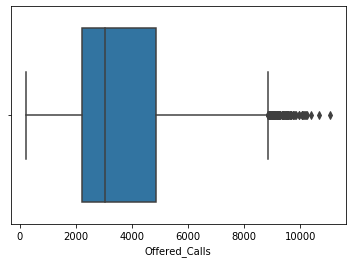

In [81]:
import seaborn as sns
sns.boxplot(x=df['Offered_Calls'])

In [82]:
df.Offered_Calls.quantile([0.25,0.5,0.75])

0.25    2229.562299
0.50    3059.706607
0.75    4873.059310
Name: Offered_Calls, dtype: float64

[array([2229.56229856,  227.05023431]), array([4873.05930964, 8837.40733726])]

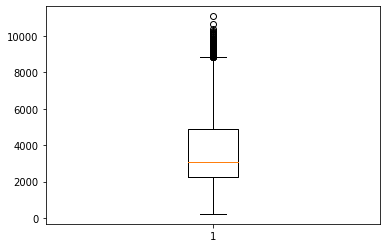

In [36]:
B=plt.boxplot(df['Offered_Calls'])
[item.get_ydata() for item in B['whiskers']]

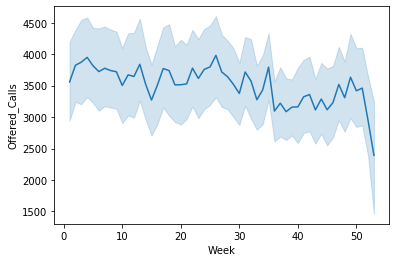

In [108]:
## Week Trends
sns.lineplot(df['Week'],df['Offered_Calls'])

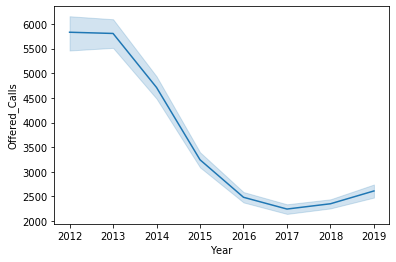

In [109]:
#Yearly Trend
sns.lineplot(df['Year'],df['Offered_Calls'])

In [83]:
df=df[df['Offered_Calls']<8837]

In [84]:
df["Date"] = pd.to_datetime(df["Date"])
test["Date"] = pd.to_datetime(test["Date"])

In [85]:
df_mon=df[(df['Date'] > '2013-01-01')]

In [86]:
df_mon.head()

,Date,Offered_Calls,Year,Week,Day,WeekDay,Weights,SpecialDay,Weekend
276,2013-01-02,8391.004509,2013,1,2,2,1.107,1,0
277,2013-01-03,8703.374925,2013,1,3,3,1.069,1,0
278,2013-01-04,8584.261905,2013,1,4,4,1.037,0,0
279,2013-01-05,3798.906593,2013,1,5,5,0.991,0,1
280,2013-01-06,2083.147102,2013,1,6,6,0.971,0,1


In [87]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [88]:
#Breaking the data and selecting features , predictors
from sklearn.model_selection import train_test_split
predictors=df_mon.drop(['Offered_Calls','Date'],axis=1)
target=df_mon['Offered_Calls']
x_train,x_cv,y_train,y_cv=train_test_split(predictors,target,test_size=0.2,random_state=42)

In [89]:
#Comparing Algorithms
def scores(i):
    lin = i()
    lin.fit(x_train, y_train)
    y_pred=lin.predict(x_cv)
    lin_r= r2_score(y_cv, y_pred)
    s.append(lin_r)
#Checking the scores by using our function
algos=[LinearRegression,KNeighborsRegressor,RandomForestRegressor,Lasso,ElasticNet,DecisionTreeRegressor]
s=[]
for i in algos:
    scores(i)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [90]:
#Checking the score
models = pd.DataFrame({
    'Method': ['LinearRegression', 'KNeighborsRegressor', 
              'RandomForestRegressor', 'Lasso','DecisionTreeRegressor'],
    'Score': [s[0],s[1],s[2],s[3],s[4]]})
models.sort_values(by='Score', ascending=False)

,Method,Score
2,RandomForestRegressor,0.948182
3,Lasso,0.712886
0,LinearRegression,0.712109
1,KNeighborsRegressor,0.630726
4,DecisionTreeRegressor,0.619775


In [91]:
#Hypertuned Model
model = RandomForestRegressor(oob_score = True,n_jobs =1,random_state =7,
                              max_features = "auto", min_samples_leaf =4)

In [92]:
model.fit(x_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
                      oob_score=True, random_state=7, verbose=0,
                      warm_start=False)

In [93]:
pred=model.predict(x_cv)

In [51]:
#R2 Score
r2_score(pred,y_cv)

0.9432726055984914

In [53]:
import numpy as np

def mean_absolute_percentage_error(y_cv, pred): 
    y_cv, pred = np.array(y_cv), np.array(pred)
    return np.mean(np.abs((y_cv - pred) / y_cv)) * 100

In [54]:
mean_absolute_percentage_error(y_cv, pred)

12.986530748193326

In [95]:
test.head()

,Date,Offered_Calls,Year,Week,Day,WeekDay,Weights,SpecialDay,Weekend
0,2019-09-30,NaN,2019,40,30,0,1.172,1,0
1,2019-10-01,NaN,2019,40,1,1,1.176,1,0
2,2019-10-02,NaN,2019,40,2,2,1.107,1,0
4,2019-10-04,NaN,2019,40,4,4,1.037,0,0
5,2019-10-05,NaN,2019,40,5,5,0.991,0,1


In [99]:
test.head()

,Date,Offered_Calls,Year,Week,Day,WeekDay,Weights,SpecialDay,Weekend
0,2019-09-30,NaN,2019,40,30,0,1.172,1,0
1,2019-10-01,NaN,2019,40,1,1,1.176,1,0
2,2019-10-02,NaN,2019,40,2,2,1.107,1,0
4,2019-10-04,NaN,2019,40,4,4,1.037,0,0
5,2019-10-05,NaN,2019,40,5,5,0.991,0,1


In [100]:
test1=test.drop(['Offered_Calls','Date'],axis=1)

In [102]:
pred2=model.predict(test1)

In [103]:
test['Offered_Calls']=pred2

In [104]:
test.head()

,Date,Offered_Calls,Year,Week,Day,WeekDay,Weights,SpecialDay,Weekend
0,2019-09-30,3944.930272,2019,40,30,0,1.172,1,0
1,2019-10-01,4318.265004,2019,40,1,1,1.176,1,0
2,2019-10-02,3416.548663,2019,40,2,2,1.107,1,0
4,2019-10-04,3271.064741,2019,40,4,4,1.037,0,0
5,2019-10-05,1376.358305,2019,40,5,5,0.991,0,1


In [106]:
result=df[['Date','Offered_Calls']]

In [107]:
result.to_csv('finalresult.csv')